In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

def get_subdirectories(directory):
    subdirectories = [name for name in os.listdir(directory) if os.path.isdir(os.path.join(directory, name))]
    return subdirectories

def list_directories(directory):
    subdirectories = get_subdirectories(directory)
    quoted_directories = ["'{}'".format(name) for name in subdirectories]
    directories_string = ', '.join(quoted_directories)
    return directories_string


# Specify the directory path
directory_path = '/content/drive/MyDrive/rice lief disesas/archive (1)'

# Call the function to get the list of directories separated by commas
directories = list_directories(directory_path)

# Print the result
print(directories)


'Tungro', 'Blast', 'Bacterialblight', 'Brownspot'


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import cv2
from sklearn.model_selection import train_test_split

In [ ]:
labels = ['Tungro', 'Blast', 'Bacterialblight', 'Brownspot']

In [ ]:
import cv2
import os
import numpy as np
from tqdm import tqdm

X_full = []
y_full = []
image_size = 128
max_pixel_value = 255  # Maximum pixel value for normalization

for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/rice lief disesas/archive (1)', i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (image_size, image_size))
        img = img.astype(np.float32) / max_pixel_value  # Normalize pixel values
        X_full.append(img)
        y_full.append(i)

X_full = np.array(X_full)
y_full = np.array(y_full)

100%|██████████| 1600/1600 [00:53<00:00, 29.91it/s] 


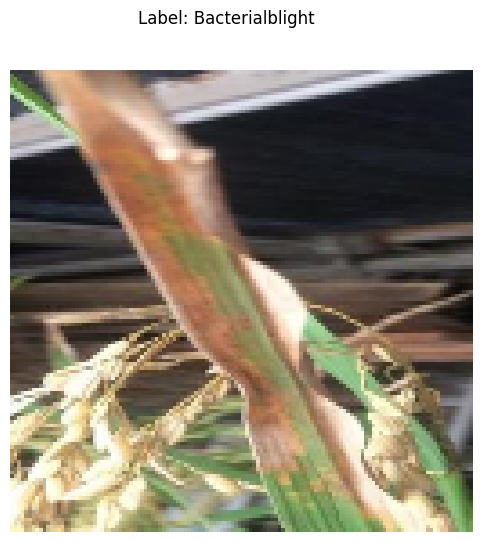

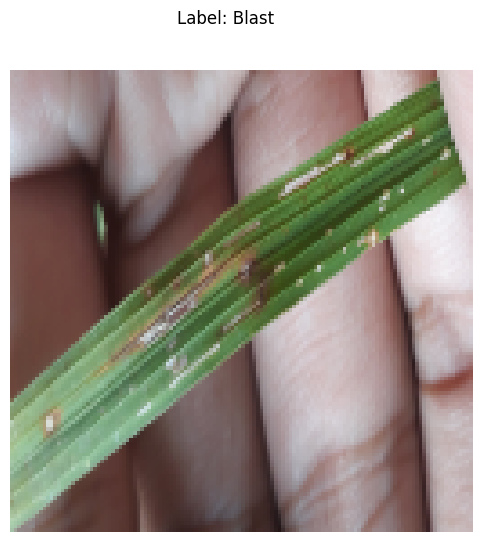

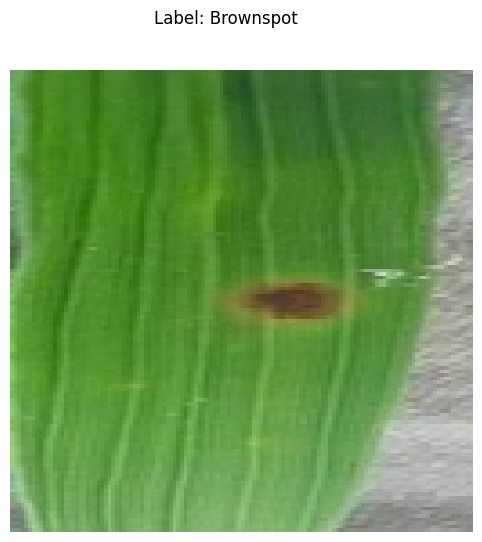

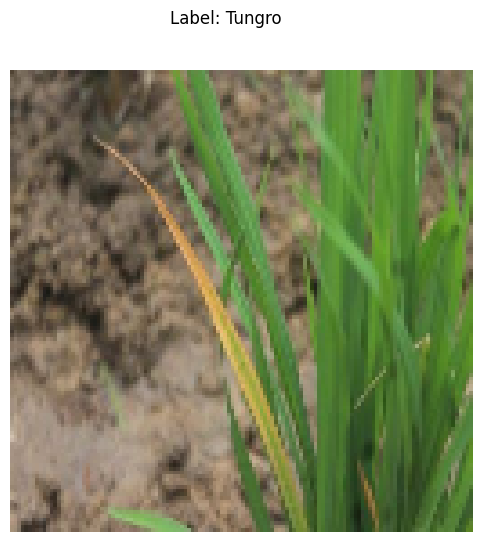

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get unique labels
unique_labels = np.unique(y_full)

# Display 1 sample image from each label
num_samples = 1

for label in unique_labels:
    # Get indices of images with the current label
    indices = np.where(y_full == label)[0][:num_samples]

    # Select the corresponding images
    images = X_full[indices]

    # Plot the images
    plt.figure(figsize=(12, 6))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(images[i])
        plt.axis('off')
    plt.suptitle('Label: ' + str(label))
    plt.show()


In [ ]:
import tensorflow as tf

In [ ]:
y_full_new = []
for i in y_full:
    y_full_new.append(labels.index(i))
y_full = y_full_new
y_full = tf.keras.utils.to_categorical(y_full)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_full,y_full, test_size=0.2,random_state=101)

In [ ]:
len(X_test)

1191

In [ ]:
del X_full,y_full
del y_full_new

In [ ]:
save_folder = '/content/drive/MyDrive/rice lief disesas'

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import concatenate, Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.applications import ResNet50V2, DenseNet201
from tensorflow.keras.optimizers import Adam

def build_hybrid_model(input_shape, num_classes):
    # Create a single input layer
    input_tensor = Input(shape=input_shape)

    # Load ResNet50V2 with ImageNet weights
    resnet = ResNet50V2(include_top=False, weights='imagenet', input_tensor=input_tensor)
    resnet.trainable = False  # Freeze the layers
    # Rename ResNet layers to avoid conflicts
    for layer in resnet.layers:
        layer._name = 'resnet_' + layer.name

    # Load DenseNet201 with ImageNet weights
    densenet = DenseNet201(include_top=False, weights='imagenet', input_tensor=input_tensor)
    densenet.trainable = False  # Freeze the layers
    # Rename DenseNet layers to avoid conflicts
    for layer in densenet.layers:
        layer._name = 'densenet_' + layer.name

    # Concatenate the outputs of the two networks
    combined = concatenate([GlobalAveragePooling2D()(resnet.output),
                            GlobalAveragePooling2D()(densenet.output)])

    # Add a fully connected layer
    x = Dense(512, activation='relu')(combined)
    x = Dropout(0.5)(x)

    # Output layer
    output = Dense(num_classes, activation='softmax')(x)

    # Create the model
    model = Model(inputs=input_tensor, outputs=output)

    # Compile the model
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Example usage
input_shape = (128, 128, 3)  # Typical size for ImageNet models
num_classes = 4  # Assuming 4 classes as per your dataset
model = build_hybrid_model(input_shape, num_classes)
model.summary()  # Show the architecture


74836368/74836368 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 densenet_resnet_input_1 (I  [(None, 128, 128, 3)]        0         []                            
 nputLayer)                                                                                       
                                                                                                  
 densenet_zero_padding2d (Z  (None, 134, 134, 3)          0         ['densenet_resnet_input_1[0][0
 eroPadding2D)                                                      ]']                           
                                                                                                  
 densenet_conv1/conv (Conv2  (None, 64, 64, 64)           9408      ['densenet_zero_padding2d[0][0
 D)                          

In [ ]:
# Assuming you have your training and validation data: X_train, y_train, X_test, y_test
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_test, y_test))


Epoch 1/10
149/149 [==============================] - 732s 5s/step - loss: 0.2919 - accuracy: 0.9179 - val_loss: 0.0188 - val_accuracy: 0.9966
Epoch 2/10
149/149 [==============================] - 690s 5s/step - loss: 0.0219 - accuracy: 0.9926 - val_loss: 0.0107 - val_accuracy: 0.9958
Epoch 3/10
149/149 [==============================] - 690s 5s/step - loss: 0.0232 - accuracy: 0.9920 - val_loss: 0.0028 - val_accuracy: 0.9992
Epoch 4/10
149/149 [==============================] - 691s 5s/step - loss: 0.0121 - accuracy: 0.9952 - val_loss: 0.0032 - val_accuracy: 0.9983
Epoch 5/10
149/149 [==============================] - 698s 5s/step - loss: 0.0044 - accuracy: 0.9985 - val_loss: 0.0018 - val_accuracy: 0.9992
Epoch 6/10
149/149 [==============================] - 687s 5s/step - loss: 0.0131 - accuracy: 0.9962 - val_loss: 0.0050 - val_accuracy: 0.9966
Epoch 7/10
149/149 [==============================] - 691s 5s/step - loss: 0.0206 - accuracy: 0.9922 - val_loss: 0.0103 - val_accuracy: 0.9983

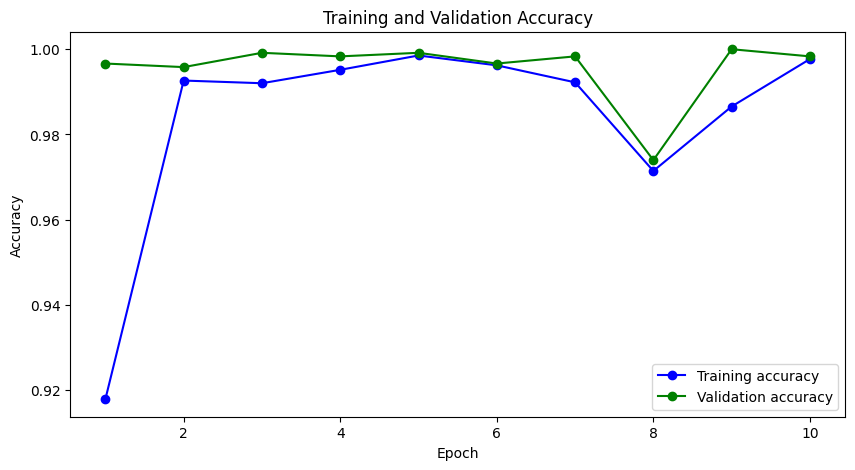

In [ ]:
import matplotlib.pyplot as plt
# Assuming 'history' is the output from the 'fit' method of your model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'go-', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report

# Load your model (if not already in memory)

# Make predictions
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute classification report
report = classification_report(y_true, y_pred, target_names=['Tungro', 'Blast', 'Bacterialblight', 'Brownspot'])
print(report)


38/38 [==============================] - 150s 4s/step
                 precision    recall  f1-score   support

         Tungro       1.00      0.99      1.00       267
          Blast       1.00      1.00      1.00       275
Bacterialblight       1.00      1.00      1.00       317
      Brownspot       1.00      1.00      1.00       332

       accuracy                           1.00      1191
      macro avg       1.00      1.00      1.00      1191
   weighted avg       1.00      1.00      1.00      1191

